# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [3]:
def plot_embedding (Xin, title=None):
    x_min, x_max = np.min(Xin,0), np.max(Xin,0)
    X2 = (Xin-x_min)/(x_max-x_min)
    fig, ax = plt.subplots(figsize=(16,10),nrows=1,ncols=1)
    for i in range(X2.shape[0]):
        ax.text(X2[i,0],X2[i,1],str(y[i]),color=plt.cm.Set1(y[i]/10),fontsize=10)

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=0,init='pca',learning_rate=200,early_exaggeration=12)

In [5]:
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

(1797, 2)


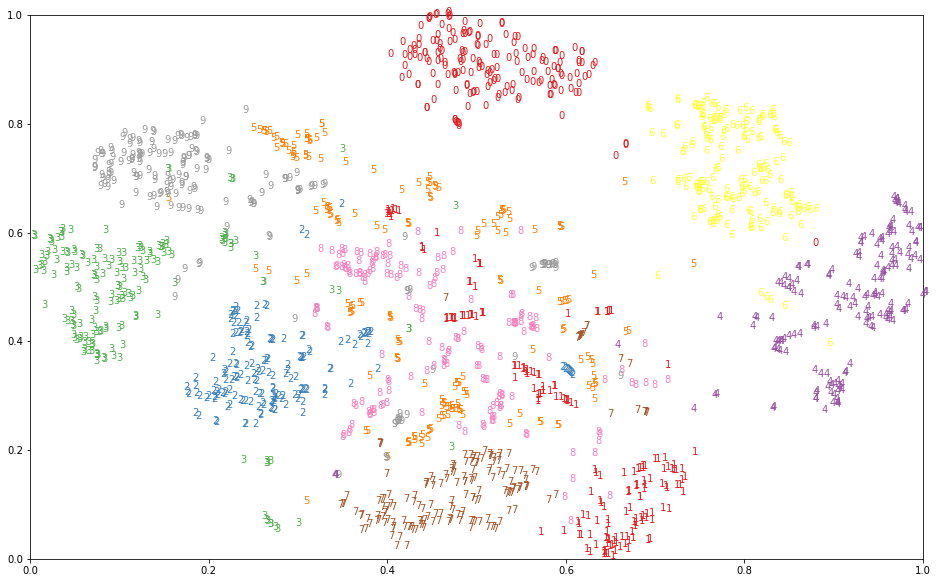

In [6]:
plot_embedding(X_tsne)

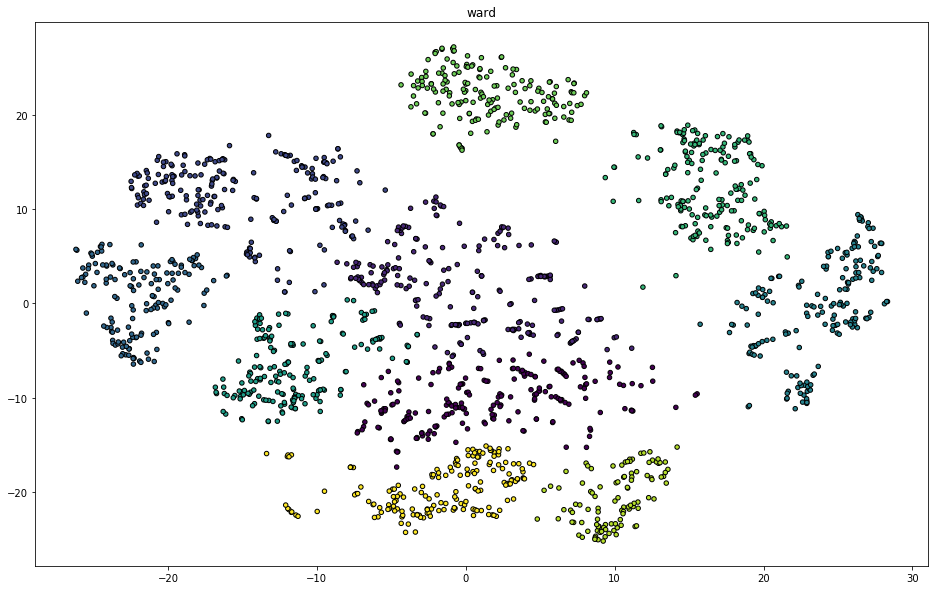

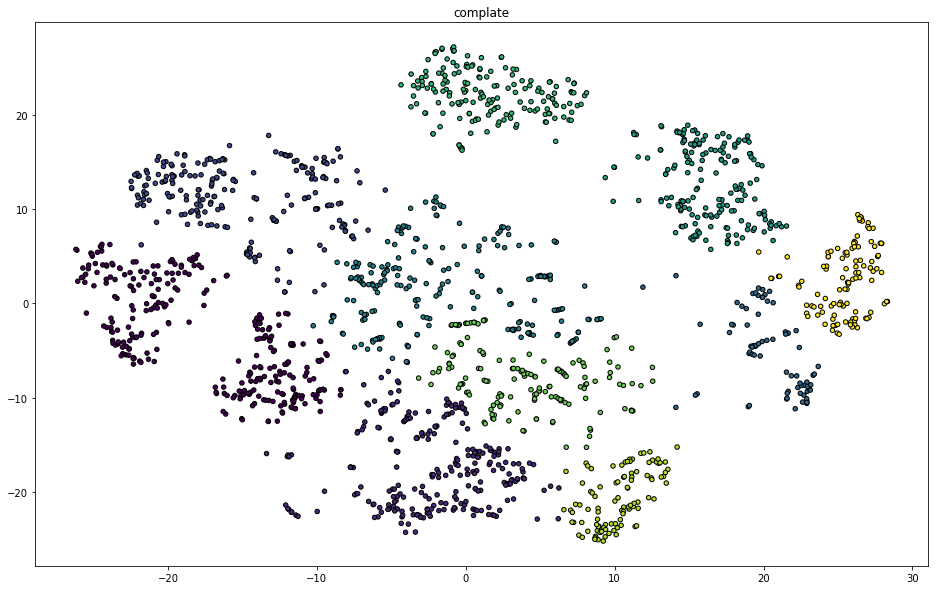

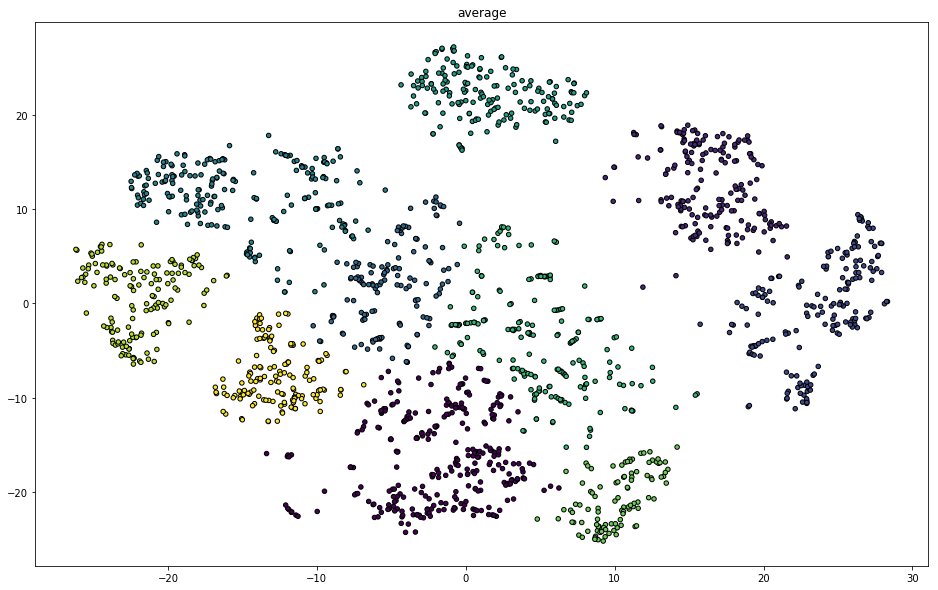

In [7]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=10, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=10, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=10, linkage="average"))]

fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(16, 10))
    ax = fig.add_subplot(111)
    
    ## fit data
    est.fit(X_tsne)
    labels = est.labels_
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels.astype(np.float), edgecolor='k',s=20)
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum+1
